In [17]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import TheilSenRegressor, LinearRegression, RANSACRegressor
from sklearn.metrics import recall_score, precision_score
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
##%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
from mlxtend.plotting import plot_decision_regions

In [2]:
df1 = pd.read_csv("nse_data.csv")

In [3]:
start16 = datetime(2016, 1, 1)
end16 = datetime(2016, 12, 31)
stamp16 = pd.date_range(start16, end16)

In [4]:
start17 = datetime(2017, 1, 1)
end17 = datetime(2017, 12, 31)
stamp17 = pd.date_range(start17, end17)

In [5]:
df1['Date'] = pd.to_datetime(df1.TIMESTAMP,format='%Y-%m-%d')
df1.index = df1['Date']

In [6]:
df1 = df1[['OPEN', 'HIGH', 'LOW', 'CLOSE', 'TOTTRDQTY', 'Date', 'PREVCLOSE', 'TOTTRDVAL', 'TOTALTRADES']]
df1['HL_PCT'] = (df1['HIGH'] - df1['LOW']) / df1['LOW'] * 100.0
df1.index = df1['Date']

In [7]:
train = []
test = []
for index, rows in df1.iterrows():
    if index in stamp16:
        train.append(list(rows))
    if index in stamp17:
        test.append(list(rows))

In [8]:
train = pd.DataFrame(train, columns = df1.columns)
test = pd.DataFrame(test, columns = df1.columns)

In [9]:
#Pre-Processing  Train Data 
X_train = train[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_train = X_train.to_dict(orient='records')
vec = DictVectorizer()
X = vec.fit_transform(x_train).toarray()
Y = np.asarray(train.CLOSE)
Y = Y.astype('int')

#Pre-Processing Test data
X_test = test[['HIGH', 'LOW', 'OPEN', 'TOTTRDQTY', 'TOTTRDVAL', 'TOTALTRADES']]
x_test = X_test.to_dict(orient='records')
vec = DictVectorizer()
x = vec.fit_transform(x_test).toarray()
y = np.asarray(test.CLOSE)
y = y.astype('int')

In [11]:
#Classifier
clf = LinearRegression()
clf.fit(X, Y) 
print("Accuracy of this Statistical Arbitrage model is: ",clf.score(x,y))
predict = clf.predict(x)
test['predict'] = predict

Accuracy of this Statistical Arbitrage model is:  0.9999512934695078


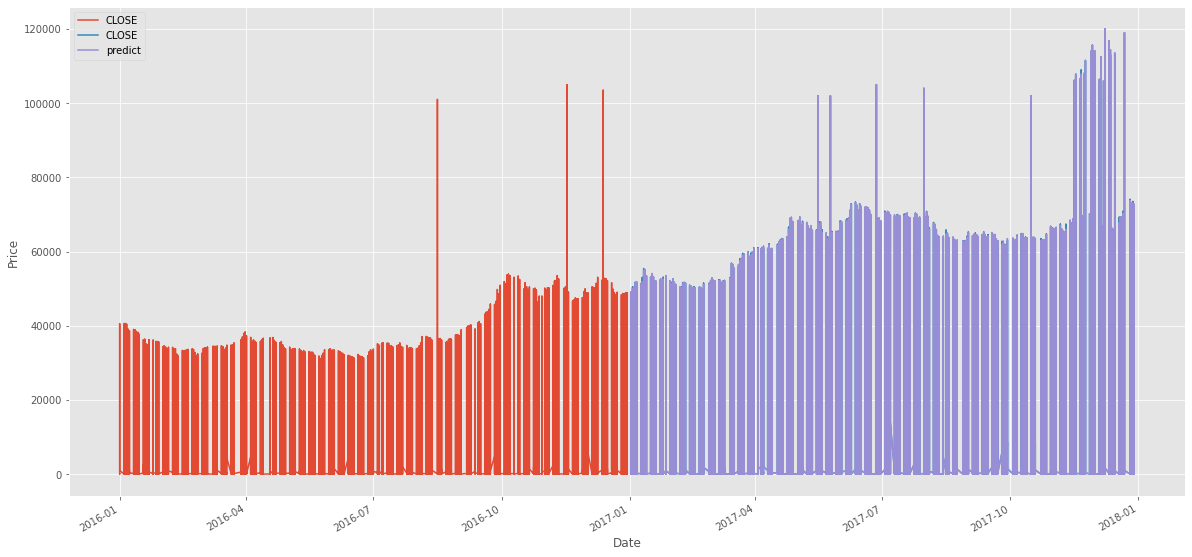

In [18]:

#Ploting 
train.index = train.Date
test.index = test.Date
train['CLOSE'].plot()
test['CLOSE'].plot()
test['predict'].plot()
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()